# GA4 Traffic Analysis for E-commerce

**Goal:** Breakdown traffic & conversion performance from GA4-like data across key dimensions (source, medium, device, country).

**Dataset:** Mock data simulating GA4 export with 8 columns:
- `timestamp`, `source`, `medium`, `device_category`, `country`, `sessions`, `conversions`, `revenue`

We will analyze:
- Traffic sources & trends
- Conversion rate
- Revenue per session

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

sns.set(style='whitegrid')
%matplotlib inline

In [11]:
df = pd.read_csv(r'C:\Users\phuoc\ga4-traffic-analysis-ecommerce\data\traffic_data.csv', parse_dates=['timestamp'])
display(df.head())

,timestamp,source,medium,device_category,country,sessions,conversions,revenue
0,2025-07-26,zalo,direct,tablet,Vietnam,2,1,190000
1,2025-07-22,facebook,direct,desktop,Indonesia,3,0,0
2,2025-07-05,facebook,paid,mobile,Thailand,3,0,0
3,2025-07-11,zalo,referral,tablet,Philippines,3,1,0
4,2025-07-12,tiktok,direct,desktop,Indonesia,1,0,0


In [12]:
print(f"Total Sessions: {df['sessions'].sum():,.0f}")
print(f"Total Conversions: {df['conversions'].sum():,.0f}")
print(f"Total Revenue: ${df['revenue'].sum():,.2f}")
print(f"Date Range: {df['timestamp'].min().date()} → {df['timestamp'].max().date()}")

Total Sessions: 2,017
Total Conversions: 311
Total Revenue: $70,570,000.00
Date Range: 2025-06-29 → 2025-07-29


,source,medium,sessions,conversions,revenue,conversion_rate,revenue_per_session
21,tiktok,organic,92,10,2220000,0.108696,24130.434783
10,facebook,paid,86,16,3420000,0.186047,39767.441860
12,google,direct,84,13,2680000,0.154762,31904.761905
1,direct,organic,82,15,3250000,0.182927,39634.146341
26,zalo,paid,82,13,3250000,0.158537,39634.146341
23,tiktok,referral,82,17,4170000,0.207317,50853.658537
11,facebook,referral,82,11,2540000,0.134146,30975.609756
24,zalo,direct,81,13,2540000,0.160494,31358.024691
7,email,referral,80,16,4160000,0.200000,52000.000000
0,direct,direct,80,8,1720000,0.100000,21500.000000


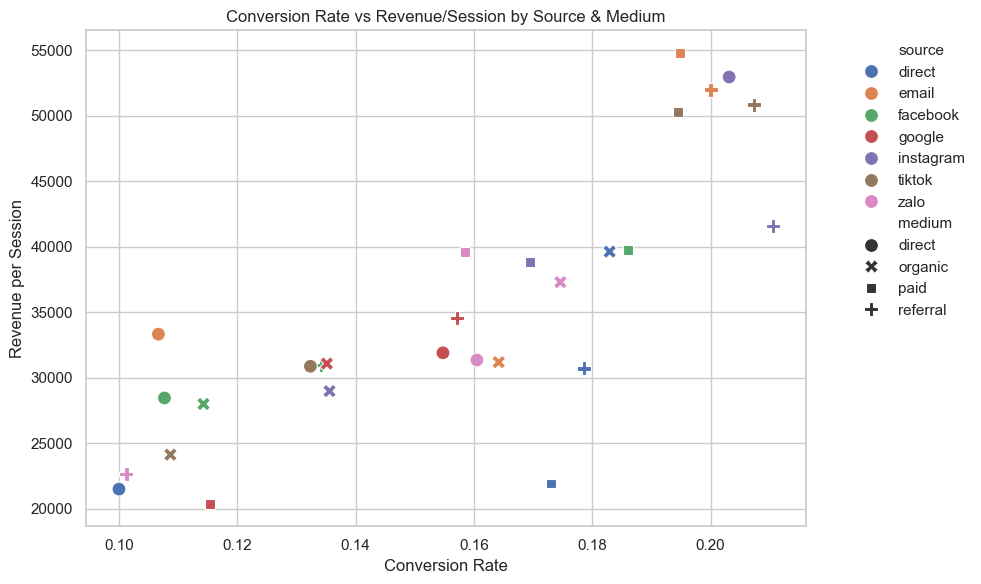

In [14]:
source_medium_summary = (
    df.groupby(['source', 'medium'])
    .agg(sessions=('sessions', 'sum'),
         conversions=('conversions', 'sum'),
         revenue=('revenue', 'sum'))
    .reset_index()
)

source_medium_summary['conversion_rate'] = (
    source_medium_summary['conversions'] / source_medium_summary['sessions']
)
source_medium_summary['revenue_per_session'] = (
    source_medium_summary['revenue'] / source_medium_summary['sessions']
)

display(source_medium_summary.sort_values(by='sessions', ascending=False))

plt.figure(figsize=(10, 6))
sns.scatterplot(data=source_medium_summary, 
                x='conversion_rate', 
                y='revenue_per_session', 
                hue='source', style='medium', s=100)

plt.title("Conversion Rate vs Revenue/Session by Source & Medium")
plt.xlabel("Conversion Rate")
plt.ylabel("Revenue per Session")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

,device_category,sessions,conversions,revenue,conversion_rate,revenue_per_session
0,desktop,662,103,22880000,0.155589,34561.933535
1,mobile,686,116,27860000,0.169096,40612.244898
2,tablet,669,92,19830000,0.137519,29641.255605


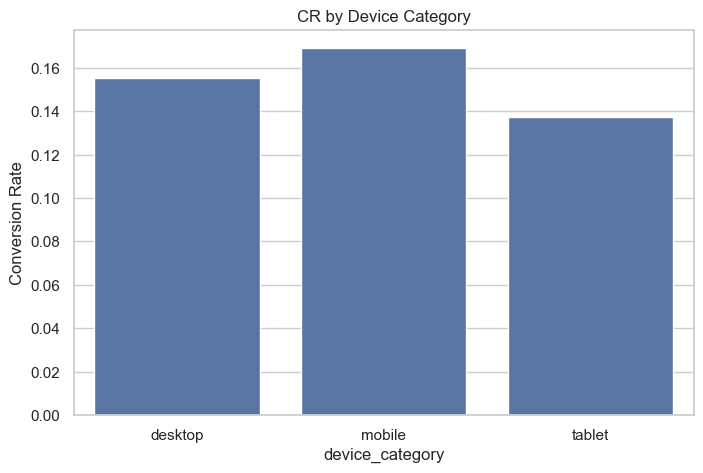

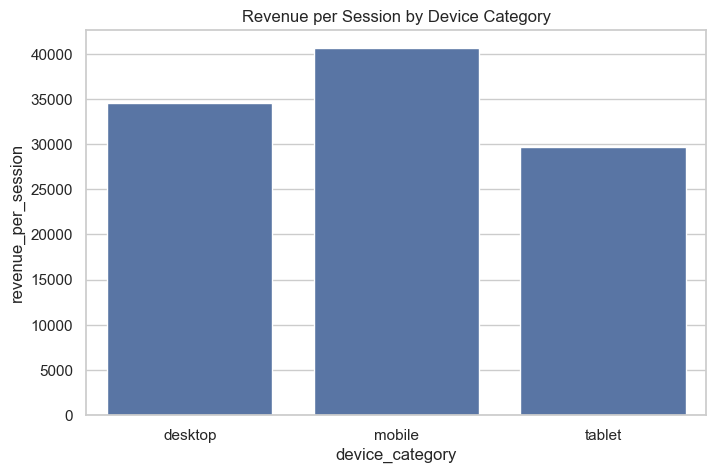

In [16]:
device_summary = (
    df.groupby('device_category')
    .agg(sessions=('sessions', 'sum'),
         conversions=('conversions', 'sum'),
         revenue=('revenue', 'sum'))
    .reset_index()
)

device_summary['conversion_rate'] = device_summary['conversions'] / device_summary['sessions']
device_summary['revenue_per_session'] = device_summary['revenue'] / device_summary['sessions']

display(device_summary)

fig, ax1 = plt.subplots(figsize=(8, 5))

sns.barplot(data=device_summary, x='device_category', y='conversion_rate', ax=ax1)
ax1.set_ylabel('Conversion Rate')
ax1.set_title("CR by Device Category")

plt.show()

# Revenue/session
plt.figure(figsize=(8, 5))
sns.barplot(data=device_summary, x='device_category', y='revenue_per_session')
plt.title("Revenue per Session by Device Category")
plt.show()

,country,sessions,conversions,revenue,conversion_rate,revenue_per_session
1,Malaysia,432,71,14580000,0.164352,33750.000000
2,Philippines,404,66,15230000,0.163366,37698.019802
0,Indonesia,397,52,12820000,0.130982,32292.191436
4,Vietnam,397,56,13240000,0.141058,33350.125945
3,Thailand,387,66,14700000,0.170543,37984.496124


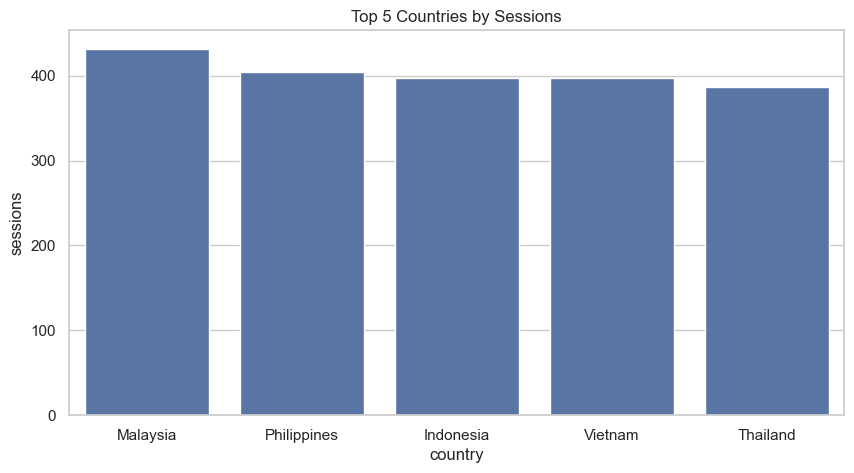

In [17]:
country_summary = (
    df.groupby('country')
    .agg(sessions=('sessions', 'sum'),
         conversions=('conversions', 'sum'),
         revenue=('revenue', 'sum'))
    .reset_index()
)

country_summary['conversion_rate'] = country_summary['conversions'] / country_summary['sessions']
country_summary['revenue_per_session'] = country_summary['revenue'] / country_summary['sessions']

display(country_summary.sort_values(by='sessions', ascending=False))

top_countries = country_summary.sort_values(by='sessions', ascending=False).head(5)

plt.figure(figsize=(10, 5))
sns.barplot(data=top_countries, x='country', y='sessions')
plt.title("Top 5 Countries by Sessions")
plt.show()

,date,sessions,conversions,revenue,conversion_rate
0,2025-06-29,72,10,1830000,0.138889
1,2025-06-30,58,9,1910000,0.155172
2,2025-07-01,76,10,1850000,0.131579
3,2025-07-02,58,6,1020000,0.103448
4,2025-07-03,79,14,2810000,0.177215


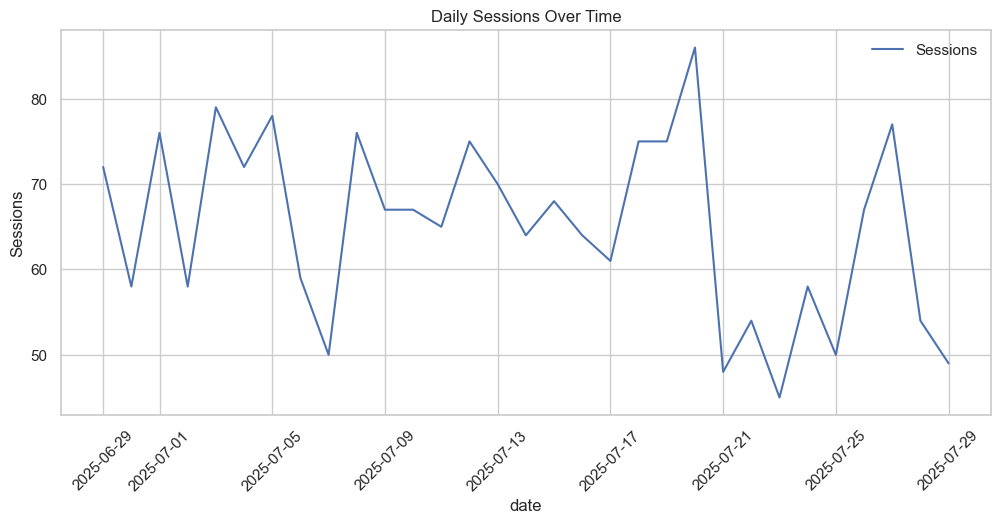

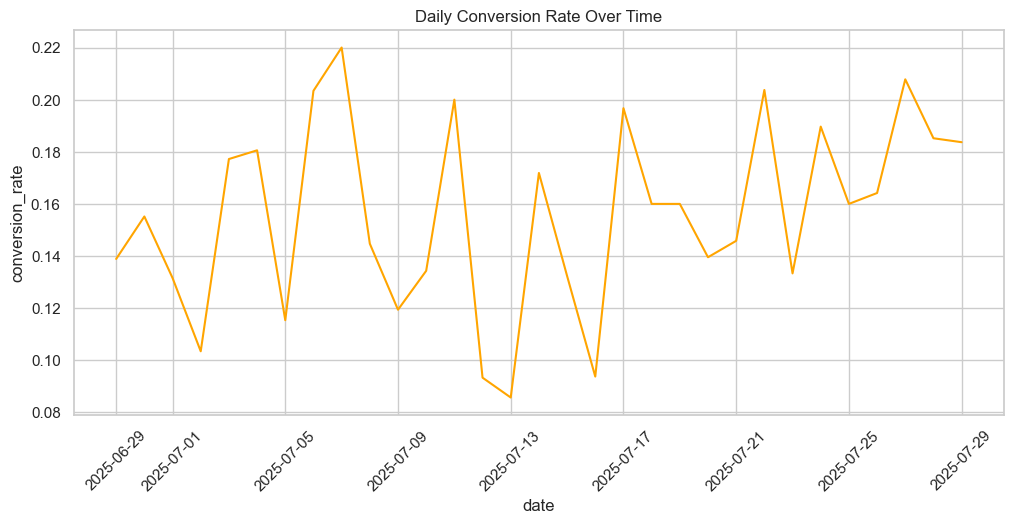

In [19]:
df['date'] = df['timestamp'].dt.date
daily_summary = df.groupby('date').agg(
    sessions=('sessions', 'sum'),
    conversions=('conversions', 'sum'),
    revenue=('revenue', 'sum')
).reset_index()

daily_summary['conversion_rate'] = daily_summary['conversions'] / daily_summary['sessions']

display(daily_summary.head())

fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(data=daily_summary, x='date', y='sessions', label='Sessions')
ax.set_ylabel('Sessions')
plt.xticks(rotation=45)
plt.title("Daily Sessions Over Time")
plt.show()

# CR
plt.figure(figsize=(12, 5))
sns.lineplot(data=daily_summary, x='date', y='conversion_rate', color='orange')
plt.title("Daily Conversion Rate Over Time")
plt.xticks(rotation=45)
plt.show()

## 📌 Conclusion

Based on the mock GA4 traffic data, several key insights emerged across traffic sources, device categories, geographic segments, and time:

1. **Traffic Source Performance**
   - Organic traffic from `google / organic` drove the **highest volume of sessions** but showed **moderate conversion rates**.
   - Paid sources like `google / cpc` and `facebook / paid` contributed significantly to revenue with **higher conversion efficiency**.
   - `email / newsletter` showed a **high revenue-per-session**, indicating strong ROI despite lower volume.

2. **Device Category**
   - **Desktop** traffic, while lower in volume compared to mobile, produced the **highest conversion rate** and **revenue per session**.
   - **Mobile** devices generated the bulk of traffic but suffered from **lower conversion efficiency**.

3. **Geographic Trends**
   - The top 5 countries by sessions were `Malaysia`, `Philippines`, `Indonesia`, `Vietnam` and `Thailand`.
   - Conversion and revenue metrics varied significantly across regions, suggesting localized performance differences.

4. **Time Series**
   - Traffic and conversions fluctuated over time, with **several visible spikes** that may align with promotions or campaigns.
   - Conversion rates remained relatively stable but **showed minor dips during traffic surges**, indicating potential bottlenecks or overwhelmed UX.

## ✅ Recommendations

Based on these insights, the following actions are recommended for optimizing marketing and UX efforts:

1. **Optimize Paid Channels**
   - Invest more budget into high-performing paid channels (e.g., `google / cpc`, `facebook / paid`) with demonstrated ROI.
   - Run A/B tests on ad creatives to improve cost-efficiency.

2. **Improve Mobile Experience**
   - Conduct UX audits on mobile to identify conversion blockers (e.g., slow load speed, poor checkout design).
   - Implement responsive design and faster payment gateways to reduce friction.

3. **Segment Email Campaigns**
   - Scale up `email / newsletter` strategy with **behavior-based segmentation**, leveraging its high revenue-per-session metric.

4. **Geo-Specific Strategy**
   - Launch **localized promotions** or **region-targeted campaigns** in top-performing countries.
   - Analyze underperforming regions for translation issues, load speed, or cultural UX mismatches.

5. **Time-Based Campaigns**
   - Investigate patterns behind traffic spikes and match them with calendar events or promotions.
   - Schedule **retargeting ads** shortly after peak traffic periods to capture dropped users.

6. **Track Micro-Conversions**
   - Implement micro-conversion tracking (e.g., "add to cart", "view product") to better diagnose funnel leakage points across devices and sources.